Дана функция f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)

In [1]:
from sympy.abc import x
from sympy import solve, solveset, diff, plot, Interval, oo, sin, cos, nonlinsolve, linsolve
from sympy import minimum, maximum, pi, tan, log, S, sqrt, evalf

In [2]:
y = ((sin(x)/2 + cos(x)/2)**2 )* sin(x)
y

(sin(x)/2 + cos(x)/2)**2*sin(x)

1. Определить корни

In [3]:
roots = solve(y, x)
roots

[0, -pi/4, 3*pi/4, pi]

In [4]:
solveset(y,x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

2. Найти интервалы, на которых функция возрастает и убывает

In [5]:
derivative = y.diff(x)
derivative

(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)

In [6]:
solve_derivative = solve(derivative, x)
for i in solve_derivative:
    print(round(i, 2))

-0.79
2.36
-2.08
2.87
1.06
-0.27


In [7]:
if solve_derivative[-1] != pi:
    solve_derivative.append(pi)
if solve_derivative[0] != -pi:
    solve_derivative.insert(0, -pi)
for i in solve_derivative:
    print(round(i, 2))

-3.14
-0.79
2.36
-2.08
2.87
1.06
-0.27
3.14


In [8]:
solve_derivative.sort()
for i in range(len(solve_derivative) - 1):
    res = derivative.subs(x, ((solve_derivative[i+1] + solve_derivative[i])/2.0))
    if res > 0:
        print(f'Функция возрастает на отрезке: {round(solve_derivative[i], 2)}, {round(solve_derivative[i+1], 2)}')
    else:
        print(f'Функция убывает на отрезке: {round(solve_derivative[i], 2)}, {round(solve_derivative[i+1], 2)}')

Функция убывает на отрезке: -3.14, -2.08
Функция возрастает на отрезке: -2.08, -0.79
Функция убывает на отрезке: -0.79, -0.27
Функция возрастает на отрезке: -0.27, 1.06
Функция убывает на отрезке: 1.06, 2.36
Функция возрастает на отрезке: 2.36, 2.87
Функция убывает на отрезке: 2.87, 3.14


3. Построить график

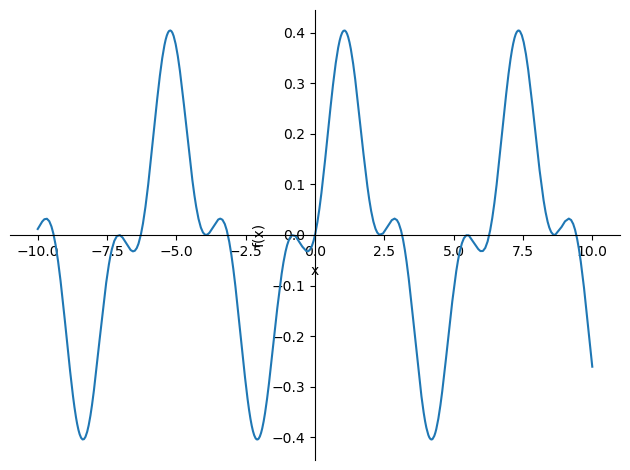

In [9]:
graff = plot(y)

4. Вычислить вершину

In [12]:
y_max = maximum(y, x, Interval(-pi, pi)).evalf()
y_min = minimum(y, x, Interval(-pi, pi)).evalf()
print(f'Максимум = {round(y_max, 3)}. Минимум = {round(y_min, 3)}')

Максимум = 0.404. Минимум = -0.404


5. Определить промежутки, на котором f > 0 и f < 0

In [10]:
if roots[-1] != pi:
    roots.append(pi)
if roots[0] != -pi:
    roots.insert(0, -pi)
roots

[-pi, 0, -pi/4, 3*pi/4, pi]

In [11]:
roots.sort()
for i in range(len(roots) - 1):
    function = y.subs(x, (roots[i+1] + roots[i])/2.0)
    if function > 0:
        print(f'f > 0: ({roots[i]}, {roots[i+1]})')
    else:
        print(f'f < 0: ({roots[i]}, {roots[i+1]})')

f < 0: (-pi, -pi/4)
f < 0: (-pi/4, 0)
f > 0: (0, 3*pi/4)
f > 0: (3*pi/4, pi)
